<a href="https://colab.research.google.com/github/JOSEPHINEGEND/IP-WEEK-9-KNN-NAIVES-BAYES/blob/master/IP_WEEK_9_USING_KNN_%26_NAVES_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Python Projects:
# 1. Predicting Survival in the Titanic Disaster.
# 2. Predicting whether an email is spam or ham.

# 1.1 Introduction

- RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. 
- There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
- RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line.
-The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster

*********************************************************

The second dataset:
* The "spam" concept is diverse and can be applied in advertisements for products/web sites, make money fast schemes, chain letters.


## 1.1.1 Defining the Questions

1. Predict if a passenger survived the sinking of the Titanic or not.
2. Predict whether an email is spam or ham.
  



## 1.1.2 Metrics for success
* Since both projects are classification problems, we will use:
     * Accuracy; threshold 85%
* For target class imbalance we will use 
* (harmonic mean between the positive rate (precision) and the negative rate (Recall))
     * F1 score; threhold 85%
 

## 1.1.3 The Context

* This is a challenge on Kaggle.com “Titanic: Machine Learning from Disaster” Competition.

* In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.


****************************************************
* In the second project we aim to construct a personalized or a general purpose spam filter
* Predicting whether an email is spam or ham from the given dataset.
* For more info: https://archive.ics.uci.edu/ml/datasets/Spambase.


## 1.1.4 Experimental Design taken
 
 **Project 1: Predicting survival in the titanic Disaster**
 * Loading the dataset
 * Exploratory Data Analysis
 * Visualization
 * Data Cleaning
 * Features Engineering
 * Modeling: K-Nearest Neighbors Classifier (KNN)
 * Hyperparameter Tuning
 * Optimization techinques for KNN 
 * Recommendations
 * Challenging the model: Random Forest Classifier
 * Conclusion
 
**Project 2: Predicting whether an email is a spam or ham**
 * Loading the dataset
 * Exploratory Data Analysis
 * Visualization
 * Modelling: Naive Bayes Classifier: GaussianNB
 * Optimizing techniques for Gaussian Naive Bayes Classifier
 * Recommendations
 * Challenging the solution: Support Vector Classifier
 * Conclusion

## 1.1.5 Appropriateness of the data
**Dataset 1 links:**
* Train set: [link text](https://www.kaggle.com/c/titanic/download/train.csv)
* Test set:[link text](https://www.kaggle.com/c/titanic/download/test.csv)

The dataset contains the following fields:
* Pclass Ticket class (: 1=upper, 2=middle, 3=lower)
* Sex : Gender
* Age : Age in years (fractional for babies)
* Sibsp : Number of siblings and spouse. Sibling = brother, sister, stepbrother, stepsister.    Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: Number of parents or children aboard the ship. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number (a string of characters)
* Fare: Passenger fare (dollars)
* Cabin: Cabin number (a string of characters)
* Embarked: Port of embarkation (S=Southampton, Q=Queenstown (now Cobh), C=Cherbourg)


**Dataset 2 link:**
* [link text](https://archive.ics.uci.edu/ml/datasets/Spambase)
* The collection of spam e-mails came from the postmaster and individuals who had filed spam.
* The collection of non-spam e-mails came from filed work and personal e-mails.
* Drawback :This dataset has no column names.


# 1.2 Importing Necessary Libraries

In [0]:
# Importing Libraries we will use for this project analysis

import pandas as pd  # for data processing
import numpy as np  # for numerical calculations


# Data Visualization Libraries
import seaborn as sns


import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

# 
import requests
from io import StringIO
import pandas_profiling as pp

# Sklearn libraries for data preparartion and performance measures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

# Algorithms
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# 1.3 Loading the datasets

- Loading the dataset by first uploading the dataset to colab can sometimes be tiresome and quite repititive.
* Therefore, I will use a function that gets the data from google drive to google colab everytime we want to use.
* This is way faster and efficient.

In [0]:
# Loading the FIRST dataset (TRAIN)

def get_file(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  raw_csv = requests.get(url).text
  csv = StringIO(raw_csv)
  return csv

train = pd.read_csv(get_file('https://drive.google.com/file/d/1nQaDe_B3Hw136ot5B_1vaqfSg1oH7HNT/view?usp=sharing'))

In [0]:
# Loading the FIRST dataset (TEST)

def get_file(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  raw_csv = requests.get(url).text
  csv = StringIO(raw_csv)
  return csv

test = pd.read_csv(get_file('https://drive.google.com/file/d/1yPfpYVT7kwfzxgGVVeGEEwW3Q1pALNC2/view?usp=sharing'))

In [0]:
# Loading the SECOND dataset 

def get_file(url):
  url = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
  raw_csv = requests.get(url).text
  csv = StringIO(raw_csv)
  return csv

df = pd.read_csv(get_file('https://drive.google.com/file/d/1sT0dcWfyAguCpBpCphEWzP-UGmZJSxgB/view?usp=sharing'))
                 

In [67]:
# Creating column names for the spam base dataset 2
# Since it has no columns names
# Using random numbers

values = np.random.random_integers(1, 60, 58)

columns = {}
column_base_name = 'Column'

for i, value in enumerate(values):
    columns['{:s}{:d}'.format(column_base_name, i)] = value

df.columns = columns
print(df.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'Column22', 'Column23',
       'Column24', 'Column25', 'Column26', 'Column27', 'Column28', 'Column29',
       'Column30', 'Column31', 'Column32', 'Column33', 'Column34', 'Column35',
       'Column36', 'Column37', 'Column38', 'Column39', 'Column40', 'Column41',
       'Column42', 'Column43', 'Column44', 'Column45', 'Column46', 'Column47',
       'Column48', 'Column49', 'Column50', 'Column51', 'Column52', 'Column53',
       'Column54', 'Column55', 'Column56', 'Column57'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 60 + 1) instead
  


# 1.4 EXPLORATORY DATA ANALYSIS

In [68]:
# Viewing the first  five observations of the train dataset
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# Viewing the first five observations of the test dataset
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
# # Viewing the first five observations of the second dataset
df.head(5)

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


We will work on the first dataset with train and test sets then later work on the second dataset.

# PART 1 : DATASET 1

In [71]:
# We will the last five observations of the train sets
# we had earlier seen the head
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the table above: 

We need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.

Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. 

We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.


In [72]:
# viewing summary information for our train set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Cabin column has a lot of missing data in both sets

In [73]:
# checking for unique values 

cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
  print(col)
  print(train[col].unique())
  print('\n')

Pclass
[3 1 2]


Sex
['male' 'female']


SibSp
[1 0 3 4 2 5 8]


Parch
[0 1 2 5 3 4 6]


Embarked
['S' 'C' 'Q' nan]




In [74]:
# Summary statistics of the two sets
# 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic.

We can also see that the passenger ages range from 0.4 to 80.

On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.


In [75]:
# checking the columns names

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 1.4.1 VISUALIZATIONS

Comparing Age and Sex and their contribution to survival of a person

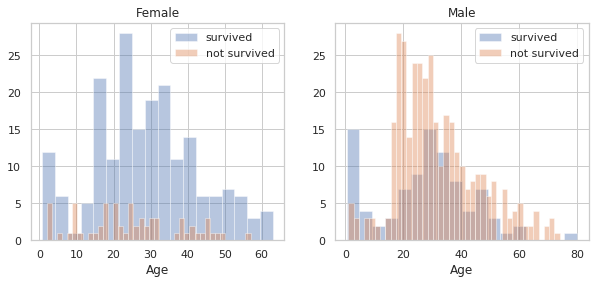

In [76]:
# Using Histograms
# Plot using seaborn
sns.set(style = 'whitegrid', context = 'notebook')
# First we create variables labeling the survived column values 0 and 1
survived = 'survived'
not_survived = 'not survived'


# creating a chart where our plots will appear
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

# creating women and male variables from the male and female variables in the dataset
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

# Plotting the histogram of the women and specifying the bin sizes, and labels as we created earlier

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

# Plotting the histogram of the men and specifying the bin sizes, and labels as we created earlier
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
plt.show()


* Survival chance of women are higher between 14 and 40
* Men have a high probability of survival when they are between 18 and 30 years old.
* In both generally infants have a little bit of higher chances of survival.
* Certain ages hava increased odds of survival.
* Creating age groups in our feature engineering may help to make every feature of the same scale.

Embarked, Pclass, Sex and their importance on passanger survival.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


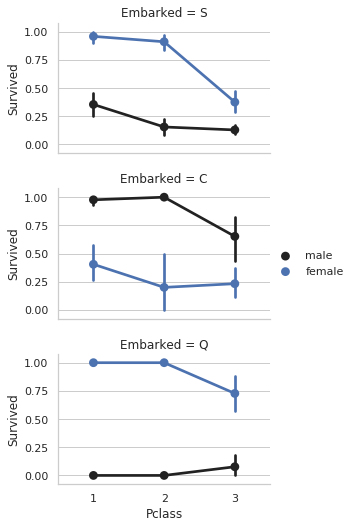

In [77]:
# Using as Multi-plot grid for plotting conditional relationships.
sns.set(style = 'whitegrid', context = 'notebook')
FacetGrid = sns.FacetGrid(train, row = 'Embarked', size = 2.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',
             palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

* Embarked seems to be correlated with survival, depending on the gender.
* Women on port Q and on port S have a higher chance of survival. 
* Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.


Pclass importance on survival

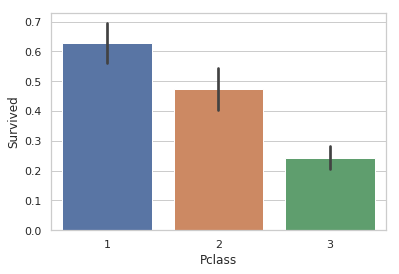

In [78]:
# Using a bar chart from seaborn
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Pclass', y='Survived', data=train)

* It is clear that people from the First class had higher chances of survival.
* Pclass is therefore an important feature to predict survival

SibSp and Parch importance in survival

SibSp and Parch would be better as a combined feature;

that shows the total number of relatives, a person has on the Titanic.

I will create it below and also a feature that shows if the passanger was alone or not.

In [79]:
# We will create new features here in both the train and test sets -
# this is part of feature engineering
# using a for loop

data = [train, test]

for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch'] # new column that has total relatives of board
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0 # new column with two classes whether you are alone or not
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset ['not_alone'].astype(int) 
  
  
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


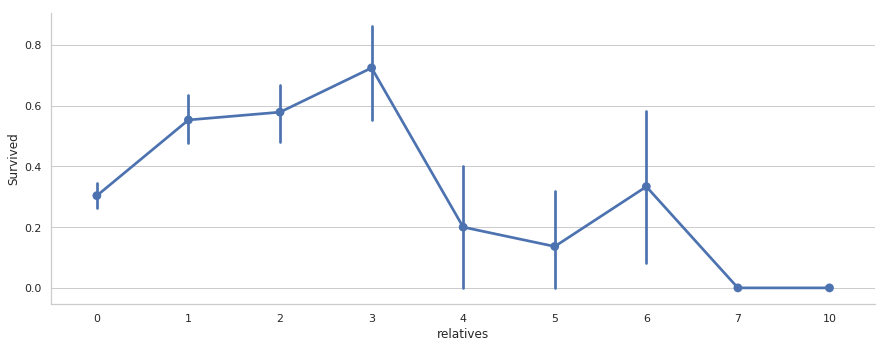

In [80]:
# plotting the new features
sns.set(style = 'whitegrid', context = 'notebook')
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )


There is a high probabilty of survival with 1 to 3 relatives

A lower probailiti of surival exists if one had less than 1 or more than 3 

(except for some cases with 6 relatives).

# 1.5 Data Cleaning

# 1.6 Feature Engineering 

The two titles are together since I cant separate some actions that need feature engineering and those that need cleaning.

For example; I need to create a new feature from an existing column then drop it.

Whatever transformation is conducted on the train will also be done to the test set.

Each step will include clear documentation to distinguish a cleaning or a feature engineering action.



## Missing values

In [81]:
# checking the mumber of missing values by column and sorting for the smallest

Total = train.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = train.isnull().sum()/train.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
not_alone,0,0.0
relatives,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled by mode.

It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values.

The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

Step 1 : Cabin column

In [82]:
# checking the number of unique values in the cabin

train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

* A cabin number looks like ‘C85’ and the letter refers to the deck.
* Therefore we’re going to extract these and create a new feature, that contains a persons deck. 
* Then we will convert the feature into a numeric variable. 
* The missing values will be converted to zero. 
* The actual decks of the titanic, ranged from A to G.

In [0]:
# Creating a new feature ; the deck column and their respective labels
# We will use REGULAR EXPRESSION;
# It's a string pattern written in a compact syntax, that allows us to quickly check
# whether a given string matches or contains a given pattern. 
# we also use a for loop to iterate through both the test and train set.


# importing regular expression
import re


deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
    
# we can now drop the cabin feature in both sets
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)


Step 2: Age column

* For the age column with missing values,
* We wil create an array coontaining random numbers
* They will be computed based on; 
            * the mean age value,
            * the spread of the age column (Standard deviation) and
            * the number of missing values.


In [84]:
# As before this will be effected both on the train and test set using a for loop

data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum() # number of null values
    
    
    # computing random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # filling the NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age    #Test element-wise for NaN and return result as a boolean array.
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)
    
train["Age"].isnull().sum()


# the zero below shows we no longer have null values

0

Step 3: Embarked column

* We will fill with the most occurring value (mode)
* There were only 2 missing values
* I will then encode the categories into numerics

In [85]:
# computing the mode

train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [86]:
# The mode is 'S'
# filling with mode

most_occur = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_occur)
    
train["Embarked"].isnull().sum()


# we have no null value as the output is zero.

0

In [0]:
# Encoding the categories

ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Step 4: Fare

* Converting fare column data type from float to integer.
* Integer operations are slightly faster than floats.

In [0]:
data = [train, test]

for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)
  

Step 5: Name Column

* Here we will extract Titles from the Name
* We will create a feature out of that to test if Title was an important feature on survival
* We will use regular expression as before to search for the title.
* we will later drop the Name column.

In [0]:
# We will perform this on both sets using as for loop.

data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)


Step 6 : Sex Column

*  Converting them into numeric in both datasets

In [0]:
gender = {"male":0, "female":1}

data = [train, test]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(gender)

Step 7: Ticket

* This columns has a very high cardinality.
* We will drop it for now in both datasets.

In [91]:
# checking the unique values
train.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [0]:
# dropping Ticket column from both sets
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

## Creating Categories

Step 8: Age Categories

* From the charts certain Ages to influenced survival.
* We want the Ages to be on the same scale.

* First we will convert it from float into integer. 
* Then we will create the new ‘AgeGroup” variable, 
* by categorizing every age into a group.
* N/B: It is important to place attention on how we form these groups, since we do not want for example that 80% of our data  to fall into a particular group.

In [93]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed
train['Age'].value_counts()

4    164
6    157
5    147
3    134
2    126
1     95
0     68
Name: Age, dtype: int64

Step 9: Fare Categories

* We will create the various categories like the Age,
* But it isn’t that easy, 
* because if we cut the range of the fare values into a few equally big categories,
* 80% of the values would fall into the first category. 
* This can be seen using a histogram of the Fare column.

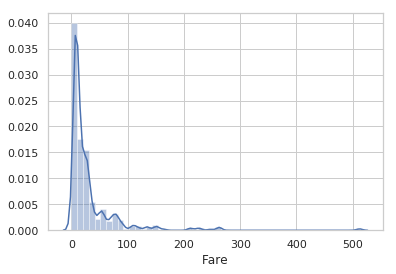

In [94]:
# Fare column histogram

sns.distplot(train.Fare)


In [0]:
# creating Fare categories in both sets of data

data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

## Creating new Features

Step 10: Age * PClass



In [0]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

Step 11: Fare per Person

In [0]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)


Step 12: Passenger ID

* This columns does not contribute to a person's survival.
* We will drop it.

In [0]:
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [99]:
# Viewing our train set before modelling

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


In [100]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,0,0,0,2,0,1,8,1,6,0
1,3,1,5,1,0,0,0,1,0,8,3,15,0
2,2,0,3,0,0,1,2,0,1,8,1,6,1
3,3,0,5,0,0,1,0,0,1,8,1,15,1
4,3,1,5,1,1,1,0,2,0,8,3,15,0


# 1.7 Building  Machine Learning Models

## 1.7.1 K-Nearest Neighbours Classifier
* KNN
* It is a supervised Machine learning algorithm
* It's non-parametric as it use flexible number of parameters.
* It makes few assumptions about the data.
* Also, an instance based algorithm;
* i.e. knn looks at the nearest neighbours to decide what any queried point should be.
* It stores all the available cases and classifies new cases by a majority vote of its K neighbours. 

Advantages
* Knn is easy to use.
* Requires quick calculation time.
* It does not make assumptions about the data.

Disadvantages

* The accuracy of the algorithm depends on the quality of the data.
* One needs to find an optimal k value (number of nearest neighbors).
* It is poor at classifying data points in a boundary where they can be classified one way or another.



* Creating a model using the train and test sets as given

In [101]:
# Splitting the data into test and train sets

X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test.copy()


# Instantiating our model and setting k as 3
knn = KNeighborsClassifier(n_neighbors=3) 

# Training our model
knn.fit(X_train, y_train) 

# Making Predictions using our model 

y_pred = knn.predict(X_test) 


# Evaluating our model using accuracy score
acc_knn = round(knn.score(X_train, y_train) * 100, 1)
acc_knn

85.3

* The train set yields 87% accuracy without splitting it further.

Splitting the train set into 80, 20 sets as instructed.

In [102]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


# Instantiating our model
# Using default  k= 5
knc = KNeighborsClassifier()


# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))



0.8212290502793296


[[103  14]
 [ 18  44]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       117
           1       0.76      0.71      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



* The 80,20 split model yielded 80% accuracy.
* Interpreting the confusion matrix;
* The first row is about the not-survived-predictions:
     * 96 passengers were correctly classified as not survived (called true negatives) 
     * 21 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 17 passengers where wrongly classified as survived (false negatives) and
     * 45 were correctly classified as survived (true positives).

Splitting the train set into 70, 30 sets as instructed.

In [103]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)


# Fitting the KNN classifier to our train data set
model3 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model3.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.8171641791044776


[[149  25]
 [ 24  70]]


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       174
           1       0.74      0.74      0.74        94

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



* The 70,30 split model yielded 75% accuracy.
* This is lower compared to the 80,20 model.
* Interpreting the confusion matrix.
* The first row is about the not-survived-predictions:
     * 131 passengers were correctly classified as not survived (called true negatives) 
     * 43 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 24 passengers where wrongly classified as survived (false negatives) and
     * 70 were correctly classified as survived (true positives).

Splitting the train set into 60, 40 sets as instructed.



In [104]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)

# Instantiating our model
knc = KNeighborsClassifier(n_neighbors = 3)

# Fitting the KNN classifier to our train data set
model3 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model3.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.7955182072829131


[[192  37]
 [ 36  92]]


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       229
           1       0.71      0.72      0.72       128

    accuracy                           0.80       357
   macro avg       0.78      0.78      0.78       357
weighted avg       0.80      0.80      0.80       357



* The 60,40 split model yielded 76% accuracy.
* This is higher compared to the 70,30 (75%); but lower than 80,20(80%).
* Interpreting the confusion matrix.
* The first row is about the not-survived-predictions:
     * 179 passengers were correctly classified as not survived (called true negatives) 
     * 50 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 35 passengers where wrongly classified as survived (false negatives) and
     * 93 were correctly classified as survived (true positives).

### Hyperparameter Tuning

Parameters to tune in KNN

* k's
* Distance Metric
* Weights

### Optimization Techniques for KNN

we can optimize KNN by:
* Dimensionality Reduction with Linear Discriminant Analysis
* Rescaling our data which makes the distance metric more meaningful. 
* Changing the distance **metric** for different applications.
* Implementing weighted voting
* Applying appropriate nearest-neighbor techniques

In [105]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
kfold = KFold(n_splits = 5, random_state = 10)  # specifying number of folds for cross validation
        
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

Using the Best parameters to assess the best split KNN model (80,20)

In [106]:
# Splitting the data into features and target variable

X = train.drop('Survived', axis = 1)
y = train.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 9, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))


0.8100558659217877


[[100  17]
 [ 17  45]]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.73      0.73      0.73        62

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


* There is great improvement in our tuned model.
* The wrongly classified classes actually reduced significantly.
* Interprating the confusion matrix:
* The first row is about the not-survived-predictions:
     * 104 passengers were correctly classified as not survived (called true negatives) 
     * 13 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 17 passengers where wrongly classified as survived (false negatives) and
     * 45 were correctly classified as survived (true positives).
     
* The F1 score = 87%, Recall= 89% & Precision = 86% also improved greatly
* Our model predicts 86% of the time, a passengers survival correctly (precision).
* The recall tells us that it predicted the survival of 89% of the people who actually survived.

## 1.7.2 Recommendations

**From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.**



## 1.7.3 Challenging the solution 


### Random Forest Classifier

* Using Random Forest which is an Ensemble algorithm.
* Also considering the Train data without splitting it further.

In [107]:
# Random Forest

# Splitting the data into test and train sets as provided earlier
# NOTE: No further split is done.

X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.copy()

# Instantiating our model
# Training the model
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1) #  Whether to use out-of-bag samples to estimate the generalization accuracy.
random_forest.fit(X_train, Y_train)

# Making predictions
Y_prediction = random_forest.predict(X_test)

# Evaluating the model
random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Generating cross-validated estimates for each input data point
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)


print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))


88.78 %
[[494  55]
 [ 94 248]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.82      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



* The Random Forest Classifier model yields 89% accuracy.

* This is a better model compared to KNN.
* However, tunning may be needed to assess the model adequately.

* The Recall score increased compared to other models.

* Interprating the confusion matrix:
* The first row is about the not-survived-predictions:
     * 492 passengers were correctly classified as not survived (called true negatives) 
     * 57 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 94 passengers where wrongly classified as survived (false negatives) and
     * 248 were correctly classified as survived (true positives).
     
* The F1 score = 87%, Recall= 90% & Precision = 84% also improved greatly
* Our model predicts 86% of the time, a passengers survival correctly (precision).
* The recall tells us that it predicted the survival of 89% of the people who actually survived.

In [0]:
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

# 1.7.4 Conclusion
* From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.**
* Splitting the data into 80,20 train and test sets was the best in the Titanic dataset.

# PART 2: DATASET 2

# 2.1 EXPLORATORY DATA ANALYSIS

In [109]:
# Checking the first five observations
df.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [110]:
# Checking the last five observations
df.tail()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [111]:
# Checking summary statistics from our dataset
df.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.10

The dataset has too many columns to analyse manually.
we really need reduction methods here to find the most important features.

In [112]:
# checking summary information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
Column0     4600 non-null float64
Column1     4600 non-null float64
Column2     4600 non-null float64
Column3     4600 non-null float64
Column4     4600 non-null float64
Column5     4600 non-null float64
Column6     4600 non-null float64
Column7     4600 non-null float64
Column8     4600 non-null float64
Column9     4600 non-null float64
Column10    4600 non-null float64
Column11    4600 non-null float64
Column12    4600 non-null float64
Column13    4600 non-null float64
Column14    4600 non-null float64
Column15    4600 non-null float64
Column16    4600 non-null float64
Column17    4600 non-null float64
Column18    4600 non-null float64
Column19    4600 non-null float64
Column20    4600 non-null float64
Column21    4600 non-null float64
Column22    4600 non-null float64
Column23    4600 non-null float64
Column24    4600 non-null float64
Column25    4600 non-null float64
Column26 

* The data has 4600 rows and 58 columns
* We have no missing values
* The columns are too many and we need to used reduction methods to reduce the data dimension.
* We will go straight to modelling since even making charts can't help in analysing the columns.
* We will plot the target variable though.

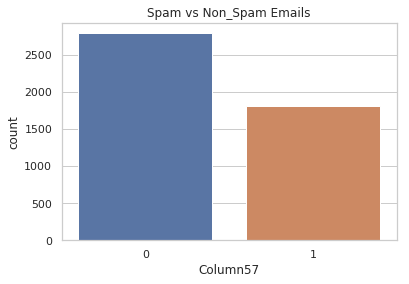

In [113]:
# Plotting the target variable 
# using seaborn

sns.countplot(df.Column57)
plt.title('Spam vs Non_Spam Emails')
plt.show()

* The target variable has two classes, the spam, and non spam emails.

* From the chart we have more non spam emails compared to spam emails.

# 2.2 Modelling

## 2.2.1 Naive Bayes Classifier

* The Naive Bayes Classifier is a statistical classification technique based on the Bayes Theorem. 

* It has high accuracy and speed on large datasets.

* This type of classifier takes into account the assumption that the effect of a particular feature in a class is independent of other features.


In [0]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the highly correlated features 
df.drop(df[to_drop], axis=1, inplace = True)

In [115]:
# checking if there are any correlated features
to_drop

['Column33']

In [116]:
# checking if there are any columns dropped
df.shape

(4600, 57)

No columns were dropped since there are no correlated features.
we will use PCA and LDA to reduce the data dimension

Splitting the Spam data into 80, 20 train and test sizes.

In [120]:
# Fitting the Naives Bayes Classifier: GausssianNB since the features are continuous
# Splitting the data

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9032608695652173


[[513  25]
 [ 64 318]]


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       538
           1       0.93      0.83      0.88       382

    accuracy                           0.90       920
   macro avg       0.91      0.89      0.90       920
weighted avg       0.90      0.90      0.90       920



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The 80,20 split model yielded 90.3% accuracy.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 513 emails were correctly classified as Ham (called true negatives) 
     * 25 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 64 emails where wrongly classified as spam (false negatives) and
     * 318 were correctly classified as Spam (true positives).
     
* In this classification we value the Recall so much. 
* The Recall is 95% which means that this is good model.
* Recall is the ability of a model to find all the relevant cases within a dataset.
* It is also called sensitivity

In [118]:
# Fitting the Naives Bayes Classifier: GausssianNB since the features are continuous
# Splitting the data

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9036231884057971


[[789  33]
 [100 458]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       822
           1       0.93      0.82      0.87       558

    accuracy                           0.90      1380
   macro avg       0.91      0.89      0.90      1380
weighted avg       0.91      0.90      0.90      1380



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The 70,30 split model also yielded 90.3% accuracy.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 789 emails were correctly classified as Ham (called true negatives) 
     * 33 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 100 emails where wrongly classified as spam (false negatives) and
     * 458 were correctly classified as Spam (true positives).
     
* The recall improved slightly from 95% in the previous model to 96%. 

In [119]:
# Fitting the Naives Bayes Classifier: GausssianNB since the features are continuous
# Splitting the data

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9081521739130435


[[1060   37]
 [ 132  611]]


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1097
           1       0.94      0.82      0.88       743

    accuracy                           0.91      1840
   macro avg       0.92      0.89      0.90      1840
weighted avg       0.91      0.91      0.91      1840



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The 60,40 split model yielded 90.8% accuracy
* This is a slight improvement compared to the previous split models.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 1060 emails were correctly classified as Ham (called true negatives) 
     * 37 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 132 emails where wrongly classified as spam (false negatives) and
     * 611 were correctly classified as Spam (true positives)..
     
* Again here the recall increased to 97%.

## 2.2.2 Optimizing Naive Bayes
Improving the performance of the Naive Bayes classifier:
 * Normalizing our data
 * Remove Redundant/ correlated features
 * Apply smoothing techniques; If our dataset has zero frequency issue, we can apply smoothing techniques such as "Laplace Correction" to predict the class of the test data set.

We have already applied the first techniques in our models which was relevant in this scenario.

## 2.2.3 Recommendation

* Normalizing or standardizing the features works greatly to improve the classifier.
* For the spam detection challenge project, using the Standard Scaler yielded the best results.
* Also, using the linear discriminant analysis for dimension reduction yields beter results compared to PCA.
* Lastly increasing the test size in the spam dataset imporved both the accuracy and the Recall.

## 2.2.4 Challenging the Solution

In [124]:
# Fitting the Support Vector Classifier
# Splitting the data

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

svc = SVC(C=0.1, gamma=0.001, kernel = 'linear')

model = svc.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9228260869565217


[[1043   54]
 [  88  655]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1097
           1       0.92      0.88      0.90       743

    accuracy                           0.92      1840
   macro avg       0.92      0.92      0.92      1840
weighted avg       0.92      0.92      0.92      1840



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The Support Vector Machine model yielded 92.2% accuracy.
* This is a great improvement compared to the Naive Bayes Gaussian models.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 10 emails were correctly classified as Ham (called true negatives) 
     * 54 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 88 emails where wrongly classified as spam (false negatives) and
     * 655 were correctly classified as Spam (true positives)..
     
* Again here the recall increased to 95%.
* This is slight reduction.
* Though the accuracy improved.

## 2.2.5 Conclusion
* The Gaussian NB is the best model since it yielded both the best Accuracy and Recall scores.
* Optimizing the model is very essential:
    1. Scaling or normalizing the features
    2. Reducing the data dimensions
    3. Increasing the test size for a large dataset.